In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

#Regression analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
fitness = pd.DataFrame(pd.read_csv("dataset for assignment 2.csv"))

1. Data Analytics

In [5]:
fitness.head()

,User ID,Gender,Age,Activity Level,Location,App Sessions,Distance Travelled (km),Calories Burned
0,1,Female,22,Active,Suburban,151,140,728
1,2,Male,50,Active,Rural,157,115,523
2,3,Male,36,Active,Urban,178,163,795
3,4,Female,36,Active,Suburban,155,85,715
4,5,Male,34,Sedentary,Rural,95,71,439


In [6]:
# Checking Null values
fitness.isnull().sum()*100/fitness.shape[0]

User ID                    0.0
Gender                     0.0
Age                        0.0
Activity Level             0.0
Location                   0.0
App Sessions               0.0
Distance Travelled (km)    0.0
Calories Burned            0.0
dtype: float64

In [7]:
fitness.describe()


,User ID,Age,App Sessions,Distance Travelled (km),Calories Burned
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,38.423600,124.366400,92.550400,432.316000
std,1443.520003,12.160631,42.689317,36.746095,187.427426
min,1.000000,18.000000,50.000000,26.000000,102.000000
25%,1250.750000,28.000000,89.000000,63.000000,285.000000
50%,2500.500000,39.000000,124.000000,89.000000,406.000000
75%,3750.250000,49.000000,161.000000,118.000000,560.000000
max,5000.000000,59.000000,199.000000,195.000000,987.000000


In [8]:
fitness[['Age', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned']] = fitness[['Age', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned']].apply(pd.to_numeric, errors='coerce')


correlation_matrix = fitness[['Age', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned']].corr()

print(correlation_matrix)

                              Age  App Sessions  Distance Travelled (km)  \
Age                      1.000000     -0.001718                -0.003733   
App Sessions            -0.001718      1.000000                 0.857045   
Distance Travelled (km) -0.003733      0.857045                 1.000000   
Calories Burned         -0.003620      0.795404                 0.680502   

                         Calories Burned  
Age                            -0.003620  
App Sessions                    0.795404  
Distance Travelled (km)         0.680502  
Calories Burned                 1.000000  


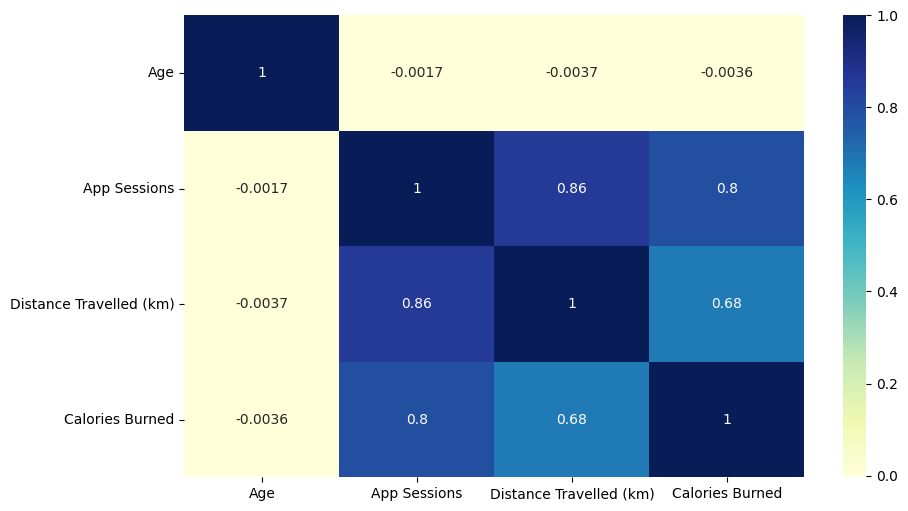

In [9]:
plt.figure(figsize = (10, 6))
sns.heatmap(correlation_matrix, annot = True, cmap="YlGnBu")

plt.show()

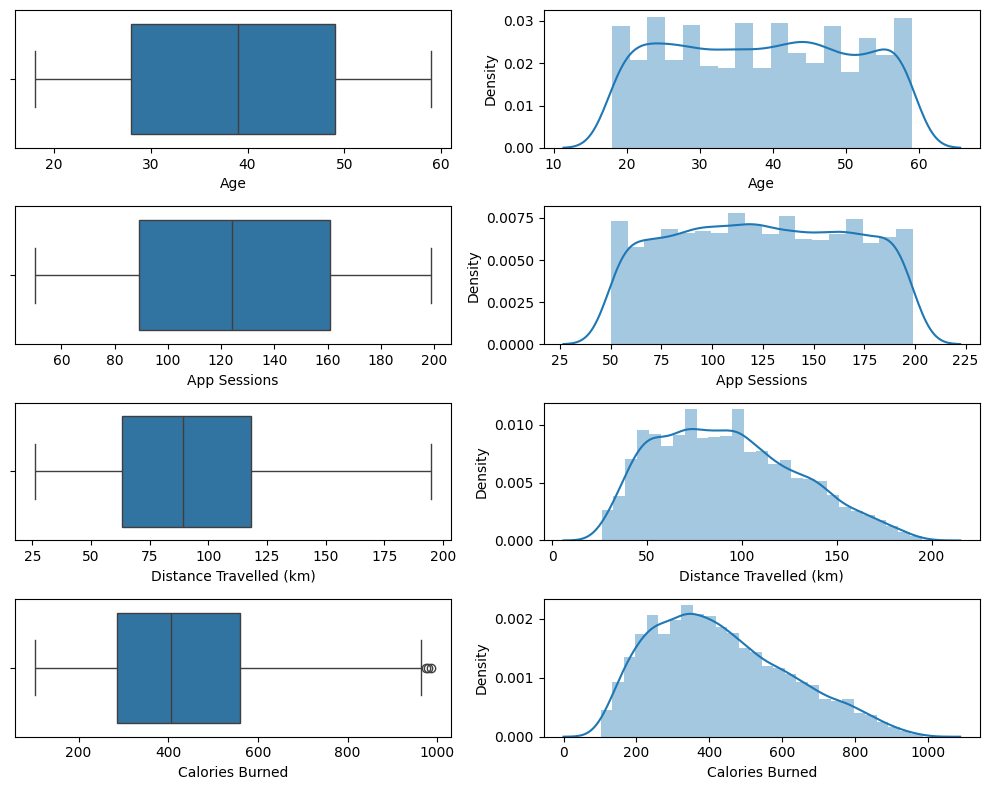

In [10]:
figure, axs = plt.subplots(4,2, figsize = (10,8)) #10 means the width and 8 means the height
pltb1 = sns.boxplot(fitness['Age'], ax = axs[0,0], orient="h")
pltd1 = sns.distplot(fitness['Age'], ax = axs[0,1]) # 1 means row and 0 means column
pltb2 = sns.boxplot(fitness['App Sessions'], ax = axs[1,0], orient="h")
pltd2 = sns.distplot(fitness['App Sessions'], ax = axs[1,1])
pltb3 = sns.boxplot(fitness['Distance Travelled (km)'], ax = axs[2,0], orient="h")
pltd3 = sns.distplot(fitness['Distance Travelled (km)'], ax = axs[2,1])
pltb4 = sns.boxplot(fitness['Calories Burned'], ax = axs[3,0], orient="h")
pltd4 = sns.distplot(fitness['Calories Burned'], ax = axs[3,1])


plt.tight_layout()

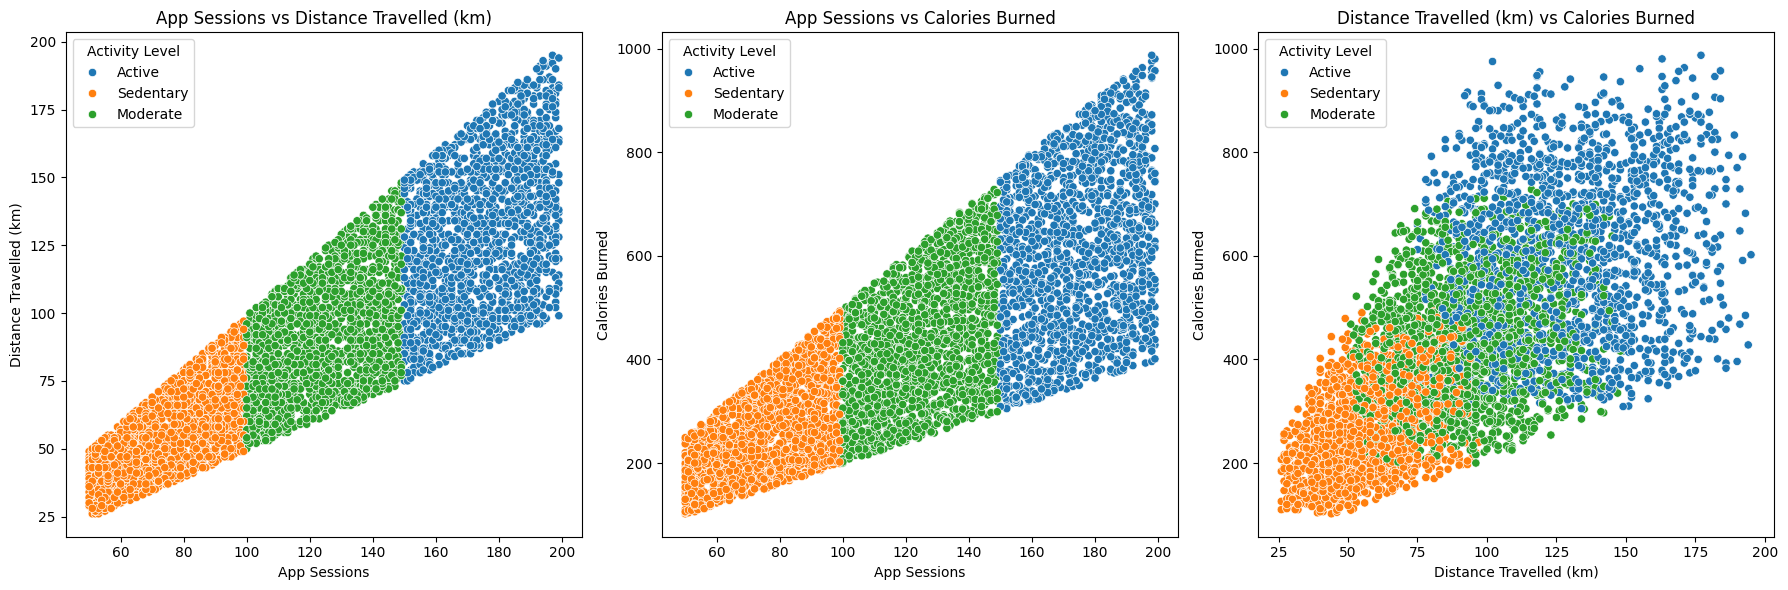

In [11]:
#Use scatterplot to show the relationshiop between app sessions and distance travelled (km) based on different activity level
figure, axs = plt.subplots(1,3, figsize = (18,6))
sns.scatterplot(data=fitness, x="App Sessions", y="Distance Travelled (km)", hue="Activity Level", ax = axs[0])
axs[0].set_title('App Sessions vs Distance Travelled (km)')
#Use scatterplot to show the relationship between app sessions and Calories Burned based on different activity level
sns.scatterplot(data=fitness, x="App Sessions", y="Calories Burned", hue="Activity Level", ax = axs[1])
axs[1].set_title('App Sessions vs Calories Burned')
#Use scatterplot to show the relationship between distance travelled (km) and Calories Burned based on different activity level
sns.scatterplot(data=fitness, x="Distance Travelled (km)", y = "Calories Burned", hue="Activity Level", ax = axs[2])
axs[2].set_title('Distance Travelled (km) vs Calories Burned')

plt.tight_layout()
plt.show()

Analyse the dataset based on cultural relevance

Male Age Group
19-34    959
35-49    931
50-64    648
0-18       0
65+        0
Name: count, dtype: int64

Female Age Group
19-34    960
35-49    877
50-64    625
0-18       0
65+        0
Name: count, dtype: int64


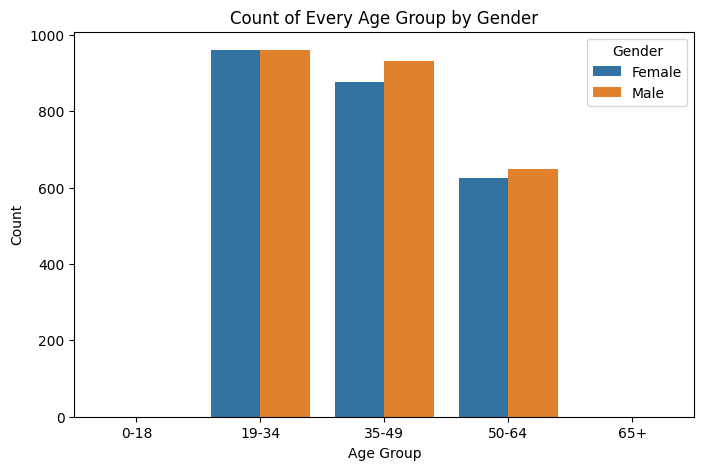

In [3]:

b= [0, 18, 34, 49 , 64, float('inf')]
l = ['0-18', '19-34', '35-49', '50-64','65+']
fitness['Age Group'] = pd.cut(fitness['Age'], bins=b, labels=l, right=False)
plt.figure(figsize=(8, 5))

print("Male", fitness[fitness['Gender'] == 'Male']['Age Group'].value_counts())
print()
print("Female", fitness[fitness['Gender'] == 'Female']['Age Group'].value_counts())

sns.countplot(x='Age Group', hue="Gender", data=fitness)


# Adding titles and labels
plt.title('Count of Every Age Group by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Display the plot
plt.show()

Active Activity Level Age Group
19-34    637
35-49    584
50-64    411
0-18       0
65+        0
Name: count, dtype: int64

Sedentary Activity Level Age Group
19-34    639
35-49    584
50-64    411
0-18       0
65+        0
Name: count, dtype: int64

Moderate Activity Level Age Group
19-34    643
35-49    640
50-64    451
0-18       0
65+        0
Name: count, dtype: int64


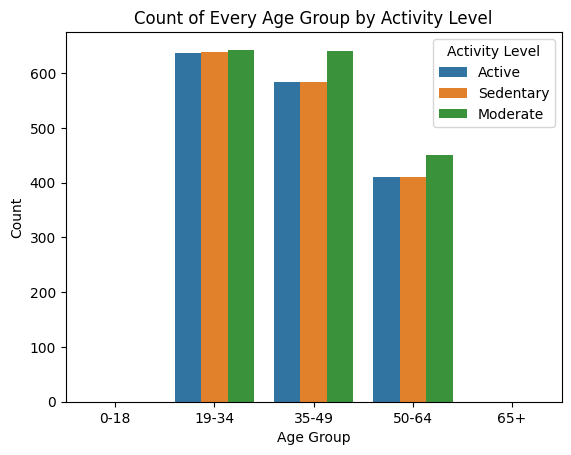

In [4]:
print("Active Activity Level", fitness[fitness['Activity Level'] == 'Active']['Age Group'].value_counts())
print()
print("Sedentary Activity Level", fitness[fitness['Activity Level'] == 'Sedentary']['Age Group'].value_counts())
print()
print("Moderate Activity Level", fitness[fitness['Activity Level'] == 'Moderate']['Age Group'].value_counts())
sns.countplot(x='Age Group', hue="Activity Level", data=fitness)


# Adding titles and labels
plt.title('Count of Every Age Group by Activity Level')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Display the plot
plt.show()

Active Activity Level Location
Urban       576
Rural       536
Suburban    520
Name: count, dtype: int64

Sedentary Activity Level Location
Suburban    560
Urban       541
Rural       533
Name: count, dtype: int64

Moderate Activity Level Location
Rural       615
Suburban    598
Urban       521
Name: count, dtype: int64


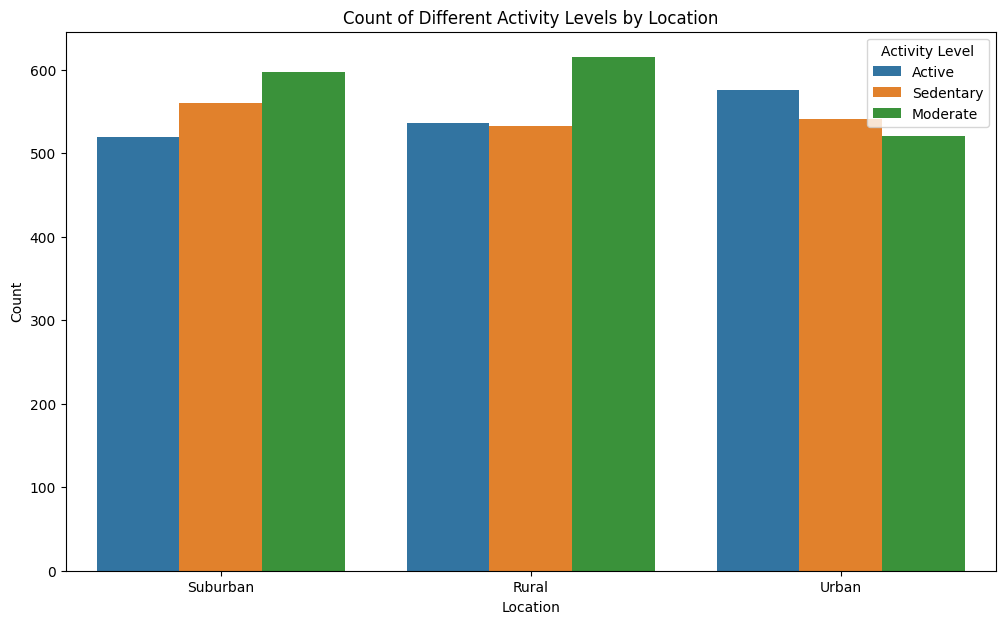

In [9]:
print("Active Activity Level", fitness[fitness['Activity Level'] == 'Active']['Location'].value_counts())
print()
print("Sedentary Activity Level", fitness[fitness['Activity Level'] == 'Sedentary']['Location'].value_counts())
print()
print("Moderate Activity Level", fitness[fitness['Activity Level'] == 'Moderate']['Location'].value_counts())
plt.figure(figsize=(12, 7))
sns.countplot(x='Location', hue='Activity Level', data=fitness)

plt.title('Count of Different Activity Levels by Location')
plt.xlabel('Location')
plt.ylabel('Count')


plt.show()

Location
Rural       1684
Suburban    1678
Urban       1638
Name: count, dtype: int64


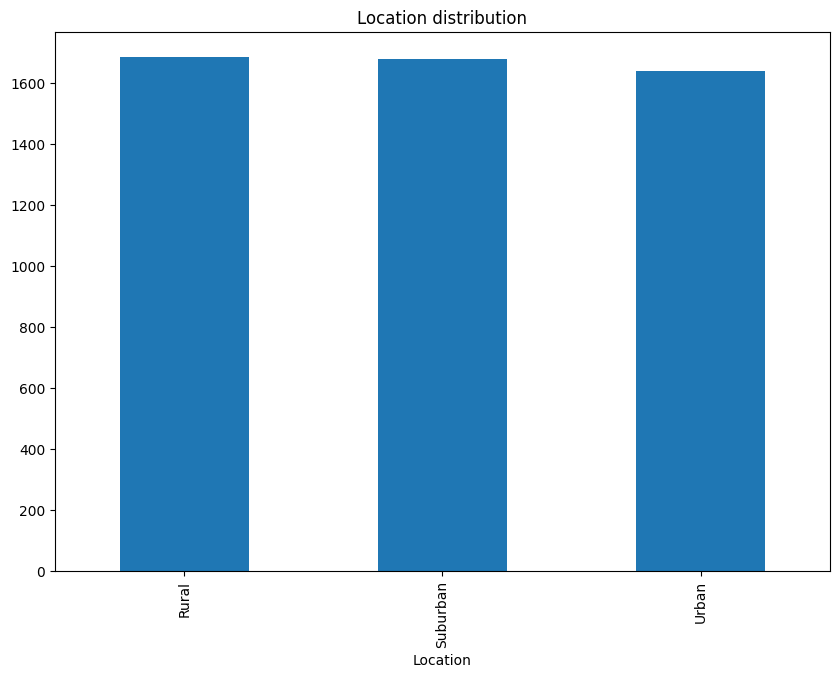

In [21]:
print(fitness['Location'].value_counts())

plt.figure(figsize=(10, 7))

fitness['Location'].value_counts().plot(kind='bar', title='Location distribution')


plt.show()


In [52]:
from scipy.stats import ttest_ind, f_oneway

# T-test for app sessions by gender
male_sessions = fitness[fitness['Gender'] == 'Male']['App Sessions']
female_sessions = fitness[fitness['Gender'] == 'Female']['App Sessions']
t_stat, p_val = ttest_ind(male_sessions, female_sessions)
print('T-test for App Sessions by Gender:', t_stat, p_val)

# ANOVA for distance travelled by location
urban_distance = fitness[fitness['Location'] == 'Urban']['Distance Travelled (km)']
suburban_distance = fitness[fitness['Location'] == 'Suburban']['Distance Travelled (km)']
rural_distance = fitness[fitness['Location'] == 'Rural']['Distance Travelled (km)']
f_stat, p_val = f_oneway(urban_distance, suburban_distance, rural_distance)
print('ANOVA for Distance Travelled by Location:', f_stat, p_val)


T-test for App Sessions by Gender: -0.41207536360618074 0.6803018576661164
ANOVA for Distance Travelled by Location: 2.142833656245782 0.1174297163902904


2. Model Performance Evaluation

2.1 Data preparation 

In [26]:

g_mapping = {'Male': 1, 'Female': 0}

l_mapping = {'Urban': 2, 'Suburban': 1, 'Rural': 0}

a_mapping = {'Active': 2, 'Moderate': 1, 'Sedentary': 0}


fitness['Gender'] = fitness['Gender'].map(g_mapping)
fitness['Location'] = fitness['Location'].map(l_mapping)
fitness['Activity Level'] = fitness['Activity Level'].map(a_mapping)


fitness.head()

,User ID,Gender,Age,Activity Level,Location,App Sessions,Distance Travelled (km),Calories Burned,High Engagement Level
0,1,0,22,2,1,151,140,728,True
1,2,1,50,2,0,157,115,523,True
2,3,1,36,2,2,178,163,795,True
3,4,0,36,2,1,155,85,715,True
4,5,1,34,0,0,95,71,439,False


In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()
vars = ['Age', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned']

fitness[vars] = scaler.fit_transform(fitness[vars])


fitness.head()

,User ID,Gender,Age,Activity Level,Location,App Sessions,Distance Travelled (km),Calories Burned,High Engagement Level
0,1,0,0.097561,2,1,0.677852,0.674556,0.707345,True
1,2,1,0.780488,2,0,0.718121,0.526627,0.475706,True
2,3,1,0.439024,2,2,0.859060,0.810651,0.783051,True
3,4,0,0.439024,2,1,0.704698,0.349112,0.692655,True
4,5,1,0.390244,0,0,0.302013,0.266272,0.380791,False


Regression Analysis

In [25]:
# from sklearn.model_selection import train_test_split

x = fitness.drop(['User ID', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned'], axis=1)
y_app_session = fitness['App Sessions']
y_distance_travelled = fitness['Distance Travelled (km)']
y_calories = fitness['Calories Burned']

#Split the data into training and testing sets
train_x, test_x, train_y_session, test_y_session = train_test_split(x, y_app_session, test_size=0.2, random_state=42)
train_x, test_x, train_y_distance, test_y_distance = train_test_split(x, y_distance_travelled, test_size=0.2, random_state=42)
train_x, test_x, train_y_calories, test_y_calories = train_test_split(x, y_calories, test_size=0.2, random_state=42)




In [26]:
# from sklearn.linear_model import LinearRegression

#Train linear regression models for app sessions
model_session = LinearRegression()
model_session.fit(train_x, train_y_session)

#Train linear regression models for distance travelled
model_distance = LinearRegression()
model_distance.fit(train_x, train_y_distance)

#Train linear regression models for calories burned
model_calories = LinearRegression()
model_calories.fit(train_x, train_y_calories)

LinearRegression()

In [27]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#predict app sessions, distance travelled, and calories burned 
y_app_session_predict = model_session.predict(test_x)
y_distance_travelled_predict = model_distance.predict(test_x)
y_calories_predict = model_calories.predict(test_x)



In [28]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def model_evaluate(predict_y, y_true):
    
    Mean_Squared_Error = mean_squared_error(y_true, predict_y)
    Mean_Absolute_Error = mean_absolute_error(y_true, predict_y)
    R2 = r2_score(y_true, predict_y)
    
    return Mean_Squared_Error,  Mean_Absolute_Error, R2

metrics_session = model_evaluate(y_app_session_predict, test_y_session)
metrics_distance = model_evaluate(y_distance_travelled_predict, test_y_distance)
metrics_calories = model_evaluate(y_calories_predict, test_y_calories)

metrics_session, metrics_distance, metrics_calories


((0.009442478459280286, 0.08403078705514551, 0.8873698071487779),
 (0.016334842362847456, 0.10348144868315204, 0.6697070525141624),
 (0.020196998766500544, 0.11554294755055555, 0.5614993053531356))

Clustering 

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [31]:
X = fitness.drop(['User ID'], axis = 1)
Kmeans = KMeans(n_clusters=3, random_state=42)
Clusters = Kmeans.fit_predict(X)

Silhouette_score = silhouette_score(X, Clusters)
print(Silhouette_score)

0.29031406158172873


Classification

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [29]:
threshold_engagement = fitness['App Sessions'].median()

fitness['High Engagement Level'] = (fitness['App Sessions'] > threshold_engagement.astype(int))

X_attribues = fitness.drop(['User ID', 'App Sessions', 'Distance Travelled (km)', 'Calories Burned', 'High Engagement Level'], axis=1)    

Y = fitness['High Engagement Level']
train_x, test_x, train_y, test_y = train_test_split(X_attribues, Y, test_size=0.2, random_state=42)

LR = LogisticRegression()
LR.fit(train_x, train_y)
predict_Y = LR.predict(test_x)

Accuracy = accuracy_score(test_y, predict_Y)
Precision = precision_score(test_y, predict_Y)
Recall = recall_score(test_y, predict_Y)

print(Accuracy, Precision, Recall)

0.997 0.997 1.0
